# Звіт


- Збір даних
    - Збір інформації про квартири (ціна, адреса, район, к-сть кімнат, площа)
    - Збір інформації про метро (назва, адреса)
    - Розрахунок відстані від кожної квартири до найближчого метро:
        - Знаходження координат метро
        - Знаходження координат квартири
        - Розрахунок відстаней до кожного метро
        - Знаходження найменшої відстану
        - !На цьому етапі виникали помилки, оскільки не для кожної адреси можно було знайти координати
        - 5979 спостережень
- Відчищення датасету
    - Видалення викидів по ціні
    - Видалення викидів по дистанції
    - Заповнення пропущених значень. Усі null-значення були в колонці з дістанцією. Заповнювалося як медіана по району. 
    - Готова до обробки інформація збережена у окремий файл
    - 5049 спостережень
- Візуалізація даних
    - Графік розподілу цін
    - Графік розподілу площ
    - Графік розподілу кількості кімнат
    - Графік розподілу дистанцій до метро
- Вибір найкращої моделі
    - Підготовка моделей:
        - Лінійна регресія
        - Лінійна регресія з стандартизацією
        - Лассо
        - Лассо з стандартизацією
        - Ридж
        - Ридж з стандартизацією
        - Еластик
        - Еластик з стандартизацією
        - Дерево рішень
        - Випадковий ліс
        - XGBoost
    - Додаткові налаштування:
        - Лінійна регресія та її похідні приймали x, x**2, x**3 (поліномільна фіча)
        - Дерева рішень приймали максимальну глибина 
        - Випадковий ліс приймав максимальну глибину
    - Трансформування даних:
        - Варінт 1. Райони - dummies, к-сть кімнат - закодовані (без змін)
        - Варінт 2. Райони - dummies, к-сть кімнат - dummies 
        - Варінт 3. Райони - закодовані (за престижем), к-сть кінмат - закодовані (без змін)
        - Варінт 4. Райони - закодовані (за престижем), к-сть кімнат - dummies
    - Кожна модель повертає чотири метрики: 
        - r^2 тренувальної виборки
        - r^2 тестової виборки
        - r^2 середнє при крос-валідації з 5 фолдами
        - середня квадратична помилка між y_predict i y_test
    - Всього розглянуто комбінацій (модель/додаткові налаштування/трансформування даних) - (3*8 + 12 + 8 + 1) * 4 = 180
    - Результатів, де всі score > 0.55, збережені у окремий файл
    - Всього комбінацій пройшло відбір - 14
- Зараз:
    - Звіт по роботі
    - Візуалізація даних
    - Візуалізація результатів моделей
    - Вибір найкращої моделі 
  

# Дані

## Завантаження даних

In [4]:
import pickle

info_flat = pickle.load(open('info_about_flat', 'rb'))

In [5]:
info_flat.describe()

,flat_price,flat_room_count,flat_area,distance
count,5049.000000,5049.000000,5049.000000,5049.000000
mean,18701.437908,1.941969,64.428384,1.653989
std,12003.424554,0.855901,31.755026,1.327015
min,2000.000000,1.000000,15.000000,0.000000
25%,10000.000000,1.000000,44.000000,0.709788
50%,15000.000000,2.000000,55.000000,1.342459
75%,25000.000000,2.000000,77.000000,2.150560
max,57350.000000,6.000000,300.000000,5.903769


## Візуалізація даних

In [6]:
import matplotlib.pyplot as plt

### Графіки розподілу.
1 Розподіл цін.   
2. Розподіл площ.   
2. Розподіл к-сті кімнат.   
3. Розподіл дистанції до метро.   

Text(0.5, 1.0, 'Distance')

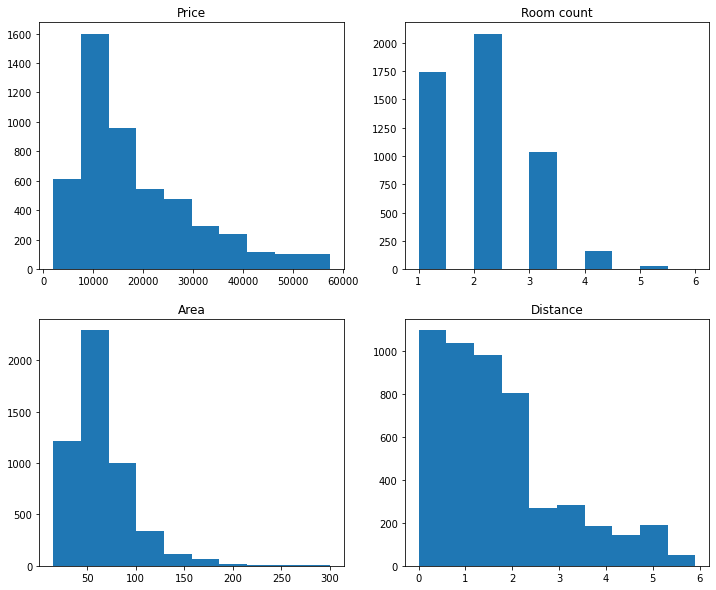

In [7]:
fig, ax = plt.subplots(2, 2, figsize = (12, 10))

ax[0][0].hist(info_flat['flat_price'])
ax[0][0].set_title("Price")
ax[1][0].hist(info_flat['flat_area'])
ax[1][0].set_title("Area")
ax[0][1].hist(info_flat['flat_room_count'], )
ax[0][1].set_title("Room count")
ax[1][1].hist(info_flat['distance'])
ax[1][1].set_title("Distance")

### Відображення залежностей.
1. Ціна від площі
2. Ціна від дистанції до метро
3. Ціна від к-сті кімнат

Text(0.5, 1.0, 'Графік залежності')

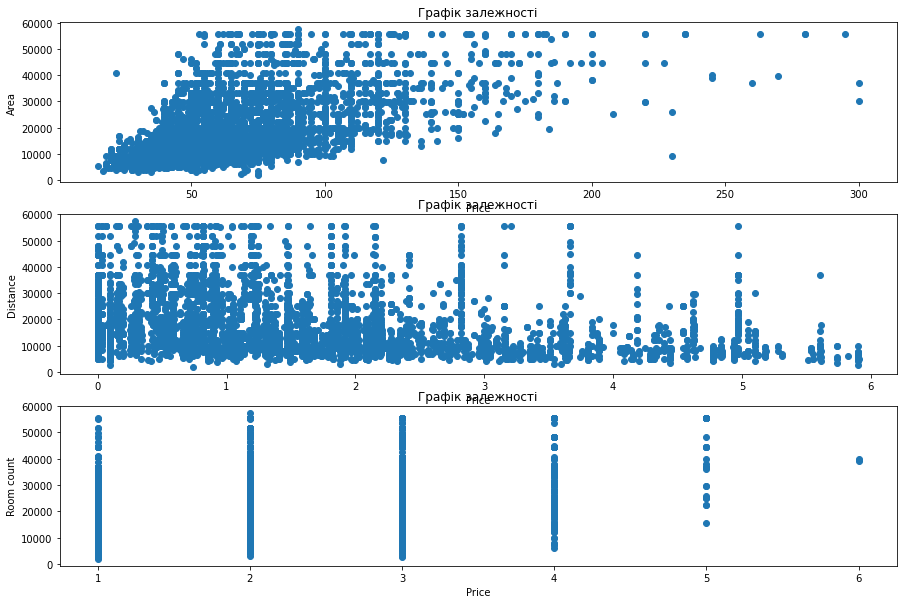

In [8]:
fig, ax = plt.subplots(3, figsize = (15, 10))

plt.subplots_adjust(wspace= 5, hspace=0.2)

ax[0].scatter(info_flat['flat_area'], info_flat['flat_price'])
ax[0].set_xlabel('Price')
ax[0].set_ylabel('Area')
ax[0].set_title('Графік залежності')
ax[1].scatter(info_flat['distance'], info_flat['flat_price'])
ax[1].set_xlabel('Price')
ax[1].set_ylabel('Distance')
ax[1].set_title('Графік залежності')
ax[2].scatter(info_flat['flat_room_count'], info_flat['flat_price'])
ax[2].set_xlabel('Price')
ax[2].set_ylabel('Room count')
ax[2].set_title('Графік залежності')

# Результати алгоритмів

## Завантаження результатів

In [9]:
result = pickle.load(open('result', 'rb'))

In [10]:
result

,model_name,score_for_train,score_for_test,mean_sq_er,score_CV,variant
0,"Lasso regression with standartscaler, degree: 3",0.592269,0.571944,7878.730797,0.557674,1
1,"Ridge regression with standartscaler, degree: 3",0.597477,0.570203,7894.738259,0.556168,1
2,"RandomForest, max_deep: 6",0.635109,0.601216,7604.575597,0.561758,1
3,"RandomForest, max_deep: 7",0.682984,0.622152,7402.262346,0.582684,1
4,XGBoost,0.888282,0.698763,6609.374098,0.658953,1
5,"RandomForest, max_deep: 6",0.635528,0.601794,7599.063258,0.561981,2
6,"RandomForest, max_deep: 7",0.683928,0.621645,7407.226146,0.582393,2
7,XGBoost,0.895422,0.699573,6600.481045,0.654289,2
8,"RandomForest, max_deep: 6",0.633326,0.591124,7700.193308,0.563712,3
9,"RandomForest, max_deep: 7",0.676411,0.607562,7543.819967,0.581965,3


## Візуалізація результатів

<bound method Figure.show of <Figure size 864x504 with 1 Axes>>

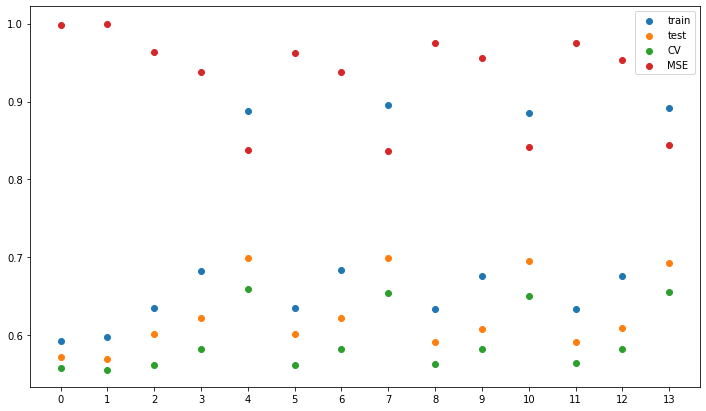

In [11]:
fig, ax = plt.subplots(figsize = (12, 7))


ax.scatter(result.index, result['score_for_train'], label= 'train')
ax.scatter(result.index, result['score_for_test'], label = 'test')
ax.scatter(result.index, result['score_CV'], label = 'CV')
ax.scatter(result.index, result['mean_sq_er']/result['mean_sq_er'].max(), label = 'MSE')
ax.set_xticks(result.index)
ax.legend(loc = 1)
fig.show

Не дивлячись на занажто добрі результати для тренувань, перенавчання немає, оскільки результати по іншим метрикам у спостережень 4 7 10 13 накрайщі

In [21]:
import pandas as pd

top4 = pd.concat([result.iloc[4], result.iloc[7], result.iloc[10], result.iloc[13]], axis=1)
top4 = top4.transpose()

In [24]:
top4

,model_name,score_for_train,score_for_test,mean_sq_er,score_CV,variant
4,XGBoost,0.888282,0.698763,6609.374098,0.658953,1
7,XGBoost,0.895422,0.699573,6600.481045,0.654289,2
10,XGBoost,0.885787,0.695978,6639.849199,0.650713,3
13,XGBoost,0.89146,0.693365,6668.327609,0.655115,4


Кожна модель найкраща по своїй, окремій метриці, тому для подальшого вибору ми створимо окрему метрику

In [25]:
top4['crit'] = top4['score_for_test'] + top4['score_CV'] - top4['mean_sq_er']/7000
top4

,model_name,score_for_train,score_for_test,mean_sq_er,score_CV,variant,crit
4,XGBoost,0.888282,0.698763,6609.374098,0.658953,1,0.413519
7,XGBoost,0.895422,0.699573,6600.481045,0.654289,2,0.410936
10,XGBoost,0.885787,0.695978,6639.849199,0.650713,3,0.398141
13,XGBoost,0.89146,0.693365,6668.327609,0.655115,4,0.395862


In [26]:
top4[top4['crit'] == top4['crit'].max()]

,model_name,score_for_train,score_for_test,mean_sq_er,score_CV,variant,crit
4,XGBoost,0.888282,0.698763,6609.374098,0.658953,1,0.413519


# Висновок
### Накращий результат показав XGBoost при першому варіанти трансформування даних (райони - dummies, к-сть кімнат - без змін)
- Score_train 88.83%
- Score_test 69.88%
- MSE 6609
- Score_CV 65.90%

# Міркування
#### Не дивлячись на занадто малу кількість даних о квартирах (ми не знали ні стан квартири, бо вбиті апартаменти навіть на Печерську здаються дешевше, ніж круті на Святошину; ніякої інформації про ремонт, бо дизайнерьский ремонт та білі блогерські квартирки дорожче звичайних; не було даних про наявну техніку, бо логічно, що гарна плазма та теплі поли зарєшають; не знали нічого про будинок, бо є Тетріс Холл, а поруч з ним стоїть хрущовка; та елітність вулиці, бо навіть на Оболоні є вулиці однаково близькі до метро, але їх престижність дуже відрізняється)

# Ідеї покращення прогнозів
#### Запровадити алгоритми для аналізу фото квартири та її опису